In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### plt.plot을 사용한 산점도

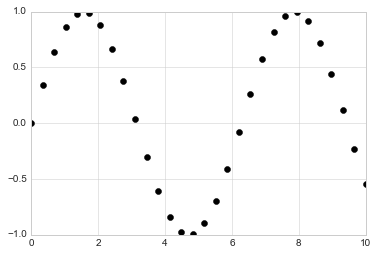

In [51]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o', color='black')

함수 호출의 세 번째 인수는 플로팅에 사용될 기호 유형을 타나내는 문자다 '-' '--'와 같은 옵션을 지정해 선 스타일을 제어할 수 있듯이 표시자(marker) 스타일도 짧은 문자열 코드를 가지고 있다. 여기에 사용할 수 잇는 전체 기호 목록은 plt.plot 문서나 Matplotlib의 온라인 문서에서 확인할 수 있다. 대 부분의 기호는 꽤 직관적이며 좀더 보편적으로 다음과 같이 사용한다.

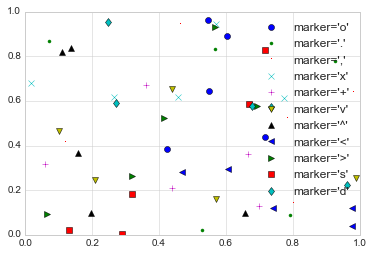

In [52]:
rng = np.random.RandomState(0)
for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
            label="marker='{0}'".format(marker))
    plt.legend(numpoints=1)
    plt.xlim(0,1.0)

이 문자 코드를 선과 색상 코드와 함께 사용해 점들을 그 연결선과 함께 플로팅 하는 것이다.

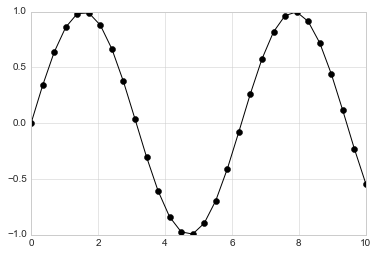

In [53]:
plt.plot(x,y,'-ok'); #선(-) 원 기호(o) 검정색(k)

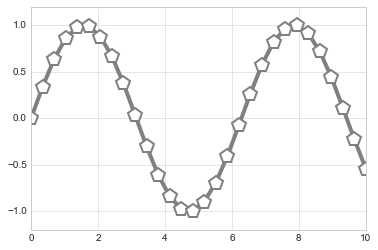

In [54]:
plt.plot(x,y,'-p', color='gray',
        markersize=15, linewidth=4,
        markerfacecolor='white',
        markeredgecolor='gray',
        markeredgewidth=2)
plt.ylim(-1.2,1.2);

### plt.scatter를 활용한 산점도
plt.scatter함수를 사용해서 산점도를 그릴 수있다.

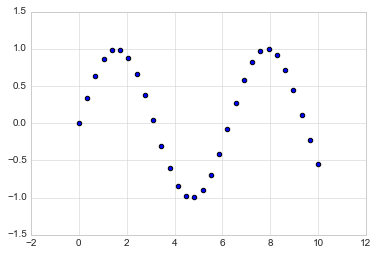

In [55]:
plt.scatter(x,y, marker='o')

plt.scatter와 plt.plot의 주요 차이점은 plt.scatter의 경우 각 점의 속성등을 개별적으로 제어하거나 데이터에 매핑할 수 있는 산점도를 만드는데 사용할 수 있다. 겹친 결과를 더 잘보이기 위해 alpha 키워드를 사용해 투명도를 조정한다.

C:\Users\PNU\AppData\Local\Temp\ipykernel_4340\3225697595.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


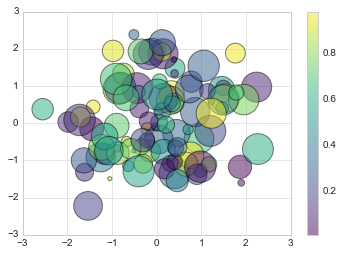

In [56]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000*rng.rand(100)
plt.scatter(x,y,c=colors, s=sizes, alpha=0.5, cmap='viridis')
#plt.grid(False)
plt.colorbar();

Text(0, 0.5, 'sepal width (cm)')

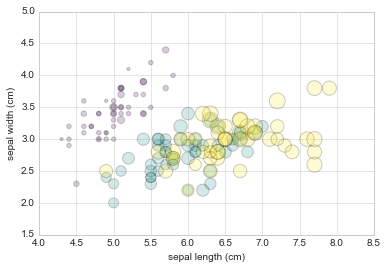

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
           s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### plot과 scatter의 차이 효율성 측면에서 유의할점
plt.plot와 plt.scatter에서 사용할 수 있는 특징이 서로 다르다는 점을 제외하고 대신 다른 하나를 사용하기로 선택하는 이유는 무엇일까? 데이터의 양이 적은 경우에는 그렇게 중요하지 않을 수 있지만 데이터세트가 수천 개가 넘어가는 경우에는 plt.plot이 plt.scatter보다 확실히 더 효율적이다. 그 이유는 plt.scatter는 각 점에 대한 다양한 크기와 색상을 나타내는 능력이 있어서 랜더러가 각 점을 개별적으로 구성하는 추가 작업을 해야하기 때문이다. 반면 plt.plot에서는 점이 기본적으로 항상 서로 복제되므로 점의 모양을 결정하는 작업이 전체 데이터 집합에 대해 한 번만 수행된다. 데이터가 큰 경우에는 이 두 차이점이 성능에 큰 차이를 가져오기 때문에 대용량의 데이터에서는 plt.plot을 사용하는 것이 plt.scatter를 사용하는 것 보다 낫다.

### 오차 시각화하기
데이터와 결과의 시각화에서 오차를 효과적으로 보여주면 더 완전한 정보를 전달 할 수 있다.
### 기본 오차 막대

<ErrorbarContainer object of 3 artists>

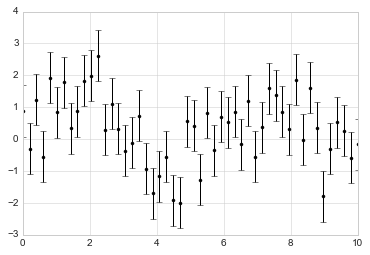

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

x= np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy*np.random.randn(50)

plt.errorbar(x,y,yerr=dy, fmt='.k')

fmt는 선과 점의 모양을 제어하는 포맷코드로 plt.plot에서 사용했던 약칭과 똑같은 구문을 갖는다. errorbar함수는 결과를 세밀하게 조정하는 다양한 옵션을 제공한다. 이 추가 옵션을 사용하면 오차 막대 그림의 모양을 쉡게 맞춤 설정할 수 있다. yerr대신 수평적 오차 막대와 단방향 오차 막대를 비롯해 여러 변형을 지정할 수 있다

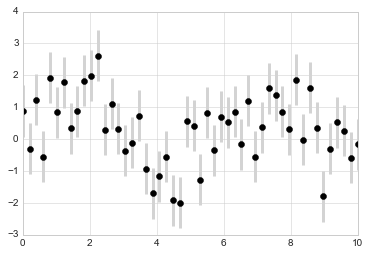

In [59]:
plt.errorbar(x,y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

### 연속 오차
때로는 연속적인 값에 대한 오차 막대를 보여주는 것이 바람직할 때가 있다. 기본 루틴은 없지만 plt.plot과 plt.fill_between같은 기본 함수를 결합해 비교적 쉽게 쓸만한 결과를 얻을 수 있다. 사이킷런을 사용해 간단한 가우시안 프로세스 회귀 모델을 수행할 것이다. 이 모델은 불확실한 연속 측정치를 가진 데이터에 매우 유여한 비모수 함수를 적합시키는 방법이다.

In [60]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 모델을 정의하고 일부 데이터를 그림
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 가우시안 프로세스 적합 계산
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, dyfit_ori = gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2 * dyfit_ori  # 2*시그마 ~ 95% 신뢰 영역

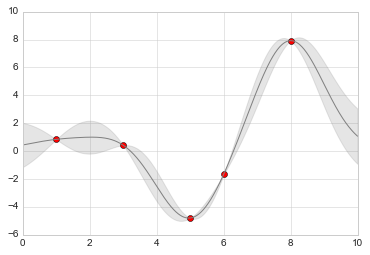

In [61]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

fill_between으로 x값과 y값의 하한값, y의 상한값을 순서대로 전달해서 그사이 영역이 채워진 결과를 얻는다. 그림에서 가우시안 프로세스회귀 알고리즘이 하는일을 직관적으로 볼 수 있다. 점 근처 영역에서 모델은 강력하게 구석되고 모델 오차가 적어지지만 점에서 멀어진 영역에서 오차는 증가하는 경향을 보인다. seaborn에서는 좀더 세련된 그림을 볼 수 있다.

### 밀도 플롯과 등고선 를롯
때로는 3차원 데이터를 등고선이나 색으로 구분한 영역을 사용해 2차원으로 표시하는 것이 유용하다. Matplotlib에서는 이 작업을 수행하는 데 도움이 되는 세 가지 함수를 다음과 같이 제공한다. plt.contour는 등고선 플롯, plt.contourf는 색이 채워진 등고선 플롯을 그리며, plt.imshow는 이미지를 보여준다.

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
import numpy as np

### 3차원 함수 시각화하기
특정 f를 선택한 함수 z=f(x,y)를 사용해 등고선 플롯을 그려보자

In [63]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10+y*x)*np.cos(x)

등고선 플롯은 plt.contour 함수로 만들 수 있다. 이 함수는 x값의 격자, y값의 격자, z값의 격자라는 세 개의 인수를 취한다. x와 y값은 플롯에서 위치를 나타내고 z값은 등고선 높이를 나타낸다. 이러한 데이터를 준비하는 가장 간단한 방식은 1차원 배열로부터 2차원 그리드를 만드는 np.meshgrid함수를 사용한다

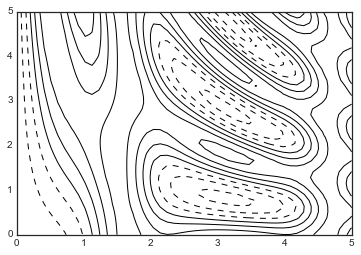

In [64]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(X,Y,Z, colors='black')

기본적으로 단색이 사용되면 음수 값은 점선으로, 양수 값 실선은 표시된다. 다른 방법으로 cmap 인수로 색상표를 지정해 선에 색을 입힐 수 있다. 여기서는 데이터 범위 내에 20개의 동일한 간격으로 더 많은 선을 그리도록 지정하겠다

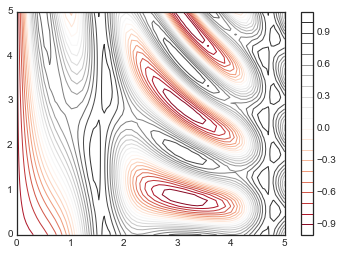

In [65]:
plt.contour(X,Y,Z, 20, cmap='RdGy');
plt.colorbar();

여기서는 중심화된 데이터에 좋은 방식은 RdGy(Red-Grey의 약어) 색상 지도를 선택했다. Matplotlib에서는 다양한 색상 지도를 사용할 수 있으며, IPython에서 plt.cm 모듈에 탭 완성 기능을 이용하면 어떤 색상 지도를 사용할 수 있는지 쉽게 확인할 수 있다.  
plt.cm.<TAB>  
    
plt.contour()와 대체로 같은 구문을 사용하는 plt.contourf()함수를 사용하면 색으로 채워진 등고선 플롯으로 바꿀 수 있다. 아울러 자동으로 플롯의 색상 정보를 레이블을 나타내는 축을 추가로 생성하는 plt.colorbar() 명령어를 추가할 것이다.

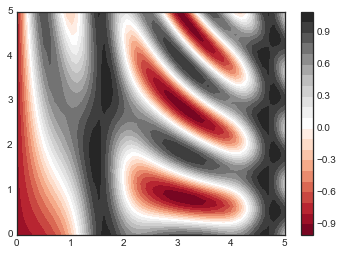

In [66]:
plt.contourf(X,Y,Z, 20, cmap='RdGy')
plt.colorbar();

검은색 영역은 높은 지점이고 붉은색 영역은 낮은 지점을 의미한다는 것을 분명하게 보여준다. 다만 색상단계가 연속적이 아니라 불연속적인데 이는 상황에따라서 바람직하지 않을 수 있다.등고선의 개수를 큰 숫자로 설정해 완화할 수있지만 그러면 정보가 지워져 비효율적으로 된다. 이 문제를 처리하는 더 나은 방식은 2차원 데이터 그리드를 이미지로 해석하는 plt.imshow()함수를 사용하는 것이다.

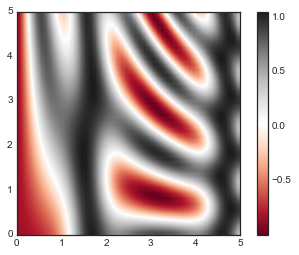

In [67]:
plt.imshow(Z, extent=[0, 5, 0, 5],
           interpolation='bilinear', origin='lower', cmap='RdGy')
plt.colorbar()
#보간법에서 None을 제외하면 nearset, bilinear등  16가지 지원

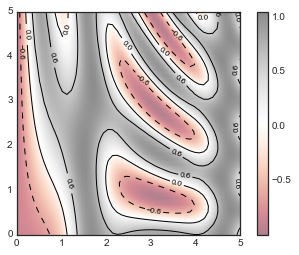

In [68]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

plt.contour, plt.contourf, plt.imshow라는 세가지 함수의 결합은 2차원 플롯 내에 이러한 3차원 데이터를 표시하는 다양한 방법을 제공한다.

### 히스토그램, 구간화, 밀도

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data=np.random.randn(1000)

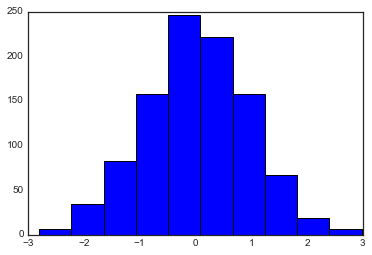

In [70]:
plt.hist(data);

hist() 함수는 계산과 표현 모두 조정할 수 있는 많은 옵션을 제공하다.

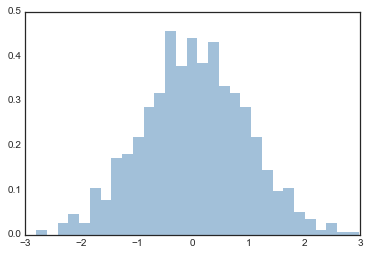

In [71]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

density=True represents the frequency distribution  
density=False represents the probability density distribution  

히스토그램을 비교할 때는 histtype = 'stepfilled'와 몇몇 투명도 alpha를 결합하는 것이 매우 유용하다.

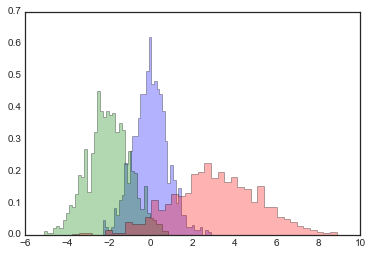

In [72]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

히스토그램을 계산만 하고 표시할 생각은 없다면 np.histogram()함수를 사용하면 된다.

In [73]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 41 241 467 225  26]


### 2차원 히스토그램과 구간화
숫자 선을 구간(bin)으로 나누어 1차원에 히스토그램을 만드는 것 처럼 점을 2차원 구간에 나누어 2차원에서도 히스토그램을 만들 수 있다. 이렇게 하는 몇 가지 방법을 간략하게 보자 먼저 다변량 가우스 분포를 띄는 x와 y 배열을 정의하자

In [74]:
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,10000).T

### plt.hist2d 2차원 히스토그램

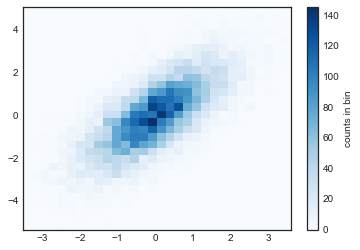

In [75]:
plt.hist2d(x,y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

plt.hist와 마찬가지로 plt.hist2d는 플롯과 구간화를 세밀하게 조정하는 다양한 추가 옵션을 가지고 있으며, 그 옵션은 함수 독스트링을 참고하면 된다. plt.hist가 np.histogram에 대응하는 것 처럼 plt.hist2d는 다음과 같이 사용할 수 있는 np.histogram2d에 대응한다.

In [76]:
counts, xedges, yedges = np.histogram2d(x,y, bins=30)

### plt.hexbin: 육각형 구간화
2차원 히스토그램은 축에 사각형 모자이크를 만든다. 이러한 모자이크에 사용할 만한 자연스러운 모양으로 정육각형도 있다. Matplotlib은 2차원 데이터 ㅔㅅ트를 육각형 그리드 내에 구간화해서 표현하는 plt.hexbin 루틴을 제공한다.

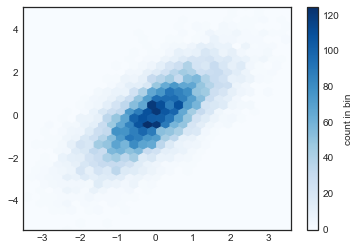

In [77]:
plt.hexbin(x,y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

다른 옵션으로 각 점에 대한 가중치를 지정하고 각 구간의 결과를 Numpy 집계(가중치 평균, 표준편차)등 변경하는 옵션이 있다.

### 커널 밀도 추정
다차원에서 밀도를 측정하는 또 다른 보편적인 방법으로 커널밀도추정(KDE, kernel density estimation)이 있다. 나중에 살펴보겠지만 KDE를 간단하게 공간상의 점들을 흐릿하게해서 부드러운 함수를 얻응 방식으로 생각해보자

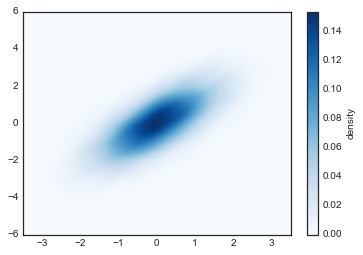

In [78]:
from scipy.stats import gaussian_kde
#배열 크기 맞추기 [Ndim, Nsamples]
data = np.vstack([x,y])
kde = gaussian_kde(data)

#정규 그리드 평가
xgrid = np.linspace(-3.5,3.5,40)
ygrid = np.linspace(-6,6,40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

#결과를 이미지로 그리기
plt.imshow(Z.reshape(Xgrid.shape), interpolation='bilinear' ,origin='lower', aspect='auto', extent=[-3.5,3.5,-6,6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE는 세부 정보와 평활 사이의 손잡이를 효율적으로 조절하는 평활 길이를 가지고 있다.(편향-분산 트레이드오프의 대표적인 예) 적합한 평활 길이를 선택하는 것에 관한 문헌은 매우 방대하며 경험법칙을 사용해서 최적에 가까운 평활 길이를 찾으려고 한다.

### 플롯 범례 맞춤 변경하기
가장 간단한 범례는 레이블이 추가된 플롯 요소에 범례를 자동으로 만들어주는 plt.legend() 명령어로 만들 수 있다.

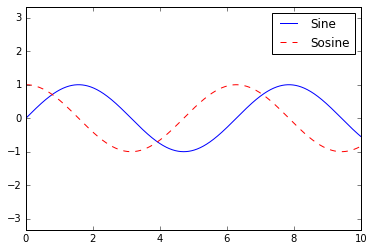

In [79]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Sosine')
ax.axis('equal')
leg = ax.legend();

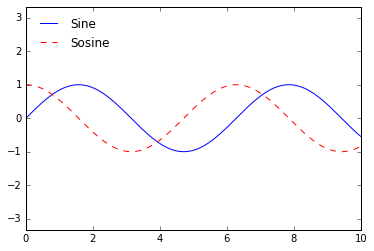

In [80]:
ax.legend(loc='upper left', frameon=False)
#범례테두리 없애고 위치지정가능
fig

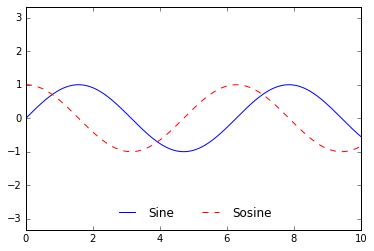

In [81]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

둥근 모서리 박스(fancybox)를 테두리로 사용하거나 음영을 추가하고 테두리의 투명도 (alpha 값)을 변경하거나 텍스트 굵기를 변경할 수 있다.

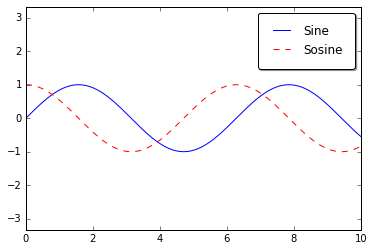

In [82]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### 범례에 사용할 요소 선택하기
범례에는 기본으로 레이블을 가진 요소가 모두 포함된다. plot명령어가 반환하는 객체를 사용해 어떤 요소와 레이블을 범례에 나타나게 할지 조정하면 된다.

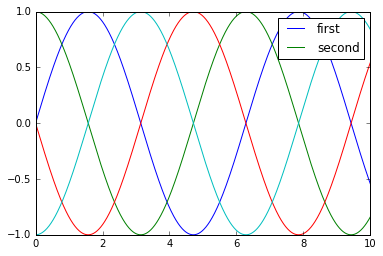

In [83]:
y = np.sin(x[:, np.newaxis]+np.pi*np.arange(0,2,0.5))
lines = plt.plot(x,y)

#라인은 plt.line2D인스턴스의 목록이다
plt.legend(lines[:2],['first','second']);

일반적으로 범례에 보여주고 싶은 플롯 요소에 레이블을 적용하는 첫 번째 방법이 대체로 더 명확하다

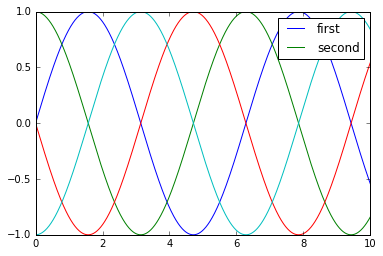

In [84]:
plt.plot(x,y[:,0], label='first')
plt.plot(x,y[:,1], label='second')
plt.plot(x,y[:,2:])
plt.legend(framealpha=1, frameon=True);

### 점 크기에 대한 범례
가령 데이터의 어떤 특징을 점 크기로 표시하고 그 사실을 반영한 범례를 만든다고 하자 여기서는 점의 크기를 사용해 캘리포니아주 도시들의 인구를 표시하는 예제를 볼 것이다

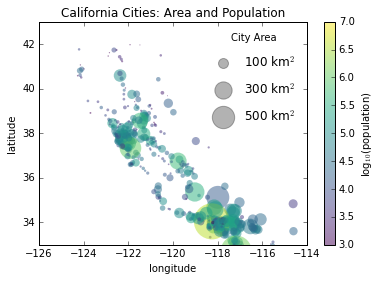

In [85]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

#관심 있는 데이터 추출
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

#레이블은 없지만 크기와 색상을 사용해 점을 뿌림
plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=0, alpha=0.5)
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3,7)

#범례생성
#원하는 크기와 레이블로 빈 리스트를 플로팅
for area in [100,300,500]:
    plt.scatter([],[],c='k',alpha=0.3, s=area, label=str(area)+' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

범례는 항상 플롯상의 객체를 참조하므로 특정 모양을 표시하려면 그것을 플로팅 해야한다. 이 경우에는 원하는 객체(회색 원)가 플롯상에 없어서 빈 리스트를 플로팅해 가짜 객체를 만든다. 또한 범례가 지정된 레이블을 가진 플릇 요소만 나열한다는 점  
빈 리스트르 ㄹ플로팅해서 범례에서 수집한 레이블을 가진 플롯 객체를 만들고 이로써 범례에서 몇 가지 유용한 정보를 얻을 수 있다.

### 다중 범례
플롯을 디자인할 때 동일한 축에 여러 범례를 추가하고 싶을 때가 있다. Matplotlib에서 이 작업을 쉽게 할 수는 없다. 표준 legend 인터페이스를 통해서는 전체 플릇에 하나의 범례만 만들 수 있기 때문이다. plt.legned()나 ax.legend()를 사용해 두 번째 범례를 만들려고 하면 두 번째 범례가 첫 번째 범례를 덮어쓸 것이다. 새로운 범례 아ㅣㅌ스트를 처음부터 만들고 나서 하위 수준의 ax.add_artist()매서드를 사용해 두 번째 아티스트를 플롯에 직접 추가하는 방식으로 해야 한다.

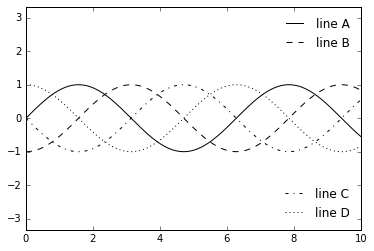

In [87]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0,10,1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

#첫 번째 범례의 라인과 레이블을 지정
ax.legend(lines[:2], ['line A','line B'], loc='upper right', frameon=False)
#두 번째 범례를 만들고 직접 아티스트를 추가
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg);

Matplotlib 플롯을 구성하는 하위 수준의 아티스트 객체를 들여다보면 알 수 있다. ax.legend()의 소스코드를 확인하면 이 함수가 단순히 적절한 legend아티스트를 만들기 위한 로직으로 구성됐음을 볼 수 있다. 이 legend 아티스트를 만들기 위한 로직으로 구성됐음을 볼 수 있다. 이 Legned아티스트는 legend_속성에 저장되고 플롯이 그려질 때 그림에 추가된다.